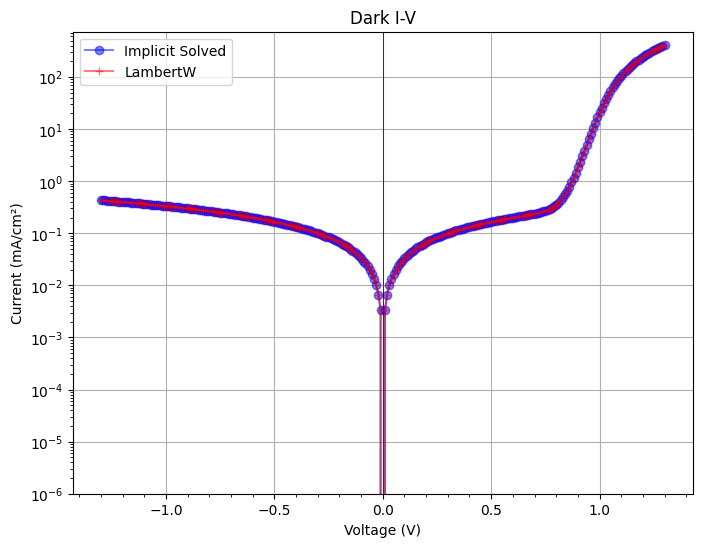

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, k
from scipy.optimize import fsolve
from scipy.special import lambertw

# Physical constants and parameters
q = e  # Elementary charge (C)
T = 300  # Temperature (K), room temperature
Vt = k * T / q  # Thermal voltage


# Calculate current (A)
# I = I0 * (np.exp((V-I*Rs)  / (n * Vt)) - 1) + (V-I*Rs)/Rsh
def dark_diode_current(v, J0, Rs, Rsh, n):
    """Calculates the dark diode current using fsolve."""
    def equation(J):
        return J - J0 * (np.exp(
            (v - J * Rs) / (n * Vt)) - 1) - (v - J * Rs) / Rsh

    J = fsolve(equation, v / Rsh)
    return J[0]


def dark_diode_current_lambertW(V, J0, Rs, Rsh, n):
    """Calculates the dark diode current using the Lambert W function."""
    # check equation (5) in the paper Solid-State Electronics 44 (2000) 1861-1864
    w = J0 * Rs * Rsh * np.exp(Rsh * (V + J0 * Rs) /
                                    (n * Vt * (Rs + Rsh))) / (n * Vt * (Rs + Rsh))

    j = (n * Vt / Rs) * lambertw(w) + ((V - J0 * Rsh) / (Rs + Rsh))
    return j.real


# Device parameters (adjust according to the actual device)
J0 = 1e-14  # Reverse saturation current (A/cm²)
n = 1.35  # Ideality factor, needs to be adjusted according to device quality, usually between 1 and 2
Rs = 0.5  # Series resistivity (Ω cm²)
Rsh = 3000  # Shunt resistivity (Ω cm²)
# Voltage range (V)
V = np.linspace(-1.3, 1.3, 261)  # Generate 261 voltage points from -1.3V to 1.3V
J = np.array([dark_diode_current(v, J0, Rs, Rsh, n) for v in V])  # A/cm²
J_lambertw = dark_diode_current_lambertW(V, J0, Rs, Rsh, n)  # A/cm²
# Plot the I-V curve
plt.figure(figsize=(8, 6))
plt.plot(V, np.abs(J) * 1e3, label='Implicit Solved', c='blue',marker='o', alpha=0.5)
plt.plot(V, np.abs(J_lambertw) * 1e3, label="LambertW", c='red',marker='+', alpha=0.5)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA/cm²)')
plt.yscale("log")
plt.ylim(1e-6)
plt.title('Dark I-V')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.minorticks_on()
plt.show()